Материалы адаптированы из курса [Deep learning на пальцах](https://github.com/sim0nsays/dlcourse_ai/blob/master/assignments/assignment1/KNN.ipynb)

#  Метод К-ближайших соседей (K-neariest neighbor classifier)

В первом задании вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.

Перед выполнением задания:
- установите все необходимые библиотеки, запустив `pip install -r requirements.txt` (если раньше не работали с `pip`, вам сюда - https://pip.pypa.io/en/stable/quickstart/)

Если вы раньше не работали с numpy, вам может помочь tutorial. Например этот:  
http://cs231n.github.io/python-numpy-tutorial/

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as SklearnKNN

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
from knn import KNN

# Загрузим и визуализируем данные

Мы будем использовать цифры из датасета MNIST.

In [53]:
X, y = load_digits(n_class=10, return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

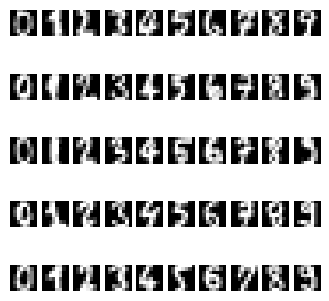

In [54]:
plt.figure(figsize=(4, 4))
plt.gray()

samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = X_train[y_train == class_index][example_index]
        plt.imshow(image.reshape(8, 8, 1).astype(np.uint8))
        plt.axis('off')
        plot_index += 1

In [147]:
# Create the classifier and call fit to train the model
# KNN just remembers all the data
K_NEIGHBORS = 1

knn_classifier = KNN(k=K_NEIGHBORS)
knn_classifier.fit(X_train)

## Пришло время написать код! 

Последовательно реализуйте функции `compute_distances_two_loops`, `compute_distances_one_loop` и `compute_distances_no_loops`
в файле `knn.py`.

Эти функции строят массив расстояний между всеми векторами в тестовом наборе и в тренировочном наборе.  
В результате они должны построить массив размера `(num_test, num_train)`, где координата `[i][j]` соотвествует расстоянию между i-м вектором в test (`test[i]`) и j-м вектором в train (`train[j]`).

**Обратите внимание** Для простоты реализации мы будем использовать в качестве расстояния меру L1 (ее еще называют [Manhattan distance](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2)).

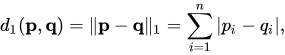

In [117]:
# TODO: implement compute_distances_two_loops in knn.py
dists = knn_classifier.compute_distances_two_loops(X_test)
assert np.isclose(dists[0, 10], np.sum(np.abs(X_test[0] - X_train[10])))

In [118]:
# TODO: implement compute_distances_one_loop in knn.py
dists = knn_classifier.compute_distances_one_loop(X_test)
assert np.isclose(dists[0, 10], np.sum(np.abs(X_test[0] - X_train[10])))

In [119]:
# TODO: implement compute_distances_no_loops in knn.py
dists = knn_classifier.compute_distances_no_loops(X_test)
assert np.isclose(dists[0, 10], np.sum(np.abs(X_test[0] - X_train[10])))

In [114]:
# Lets look at the performance difference
%timeit knn_classifier.compute_distances_two_loops(X_test)
%timeit knn_classifier.compute_distances_one_loop(X_test)
%timeit knn_classifier.compute_distances_no_loops(X_test)

In [148]:
# TODO: implement kneighbors in knn.py
prediction = knn_classifier.kneighbors(X_test)

In [149]:
sklearn_classifier = SklearnKNN(n_neighbors=K_NEIGHBORS, metric='l1')
sklearn_classifier.fit(X_train, y_train)
true_prediction = sklearn_classifier.kneighbors(X_test, return_distance=False)

In [150]:
assert np.isclose(true_prediction[:5], prediction[:5]).all()